In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import pickle

In [2]:
ratings = pd.read_csv("5 ratings_mutual_information_optimized.csv")

# Long tail plot

In [3]:
number_of_ratings = ratings.groupby('movieId').count()['rating']
ratings_sorted = number_of_ratings.sort_values(ascending=False)
ratings_sorted.index=range(len(ratings_sorted))

In [37]:
# 50%
ratings_sorted.sum()

9408436

In [38]:
ratings_sorted.cumsum()[192]

4706977

<AxesSubplot:ylabel='Number of ratings'>

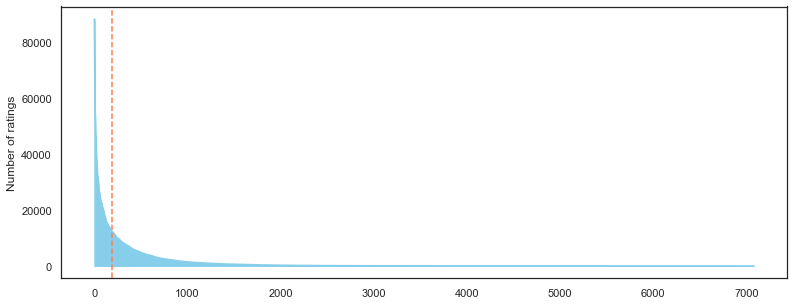

In [35]:
sns.set_theme(style="white")
plt.figure(figsize=(13,5))
plt.fill_between(ratings_sorted.index, ratings_sorted, color='skyblue')
plt.ylabel('Number of ratings')
plt.axvline(x=192, color='coral', linestyle='--')

sns.lineplot(x=ratings_sorted.index, y=ratings_sorted, color='skyblue')

# Coverage

In [3]:
suggestions = pd.DataFrame(columns=['NNS', 'Global', 'Bi-clustering'])

In [4]:
ratings1 = pd.read_csv('ratings.csv')
ratings2 = pd.read_csv('2 ratings.csv')
ratings3 = pd.read_csv("5 ratings_mutual_information_optimized.csv")

In [15]:
ratings1['movieId'].nunique()

45115

In [16]:
ratings2['movieId'].nunique()

7427

In [17]:
ratings3['movieId'].nunique()

7082

In [38]:
coverage = pd.DataFrame(data=((45115, 7799), (7427, 604), (7082, 24)), columns=['All movies', 'Suggested_to_100'])

coverage['Method'] = ('Naive recommendation (NNS)', 'Global recommendation', 'Bi-clustering recommendation')
coverage['Ratios'] = coverage['Suggested_to_100'] / coverage['All movies'] * 100

# Popularity recommender
popularity = {'All movies':-1, 'Suggested_to_100': -1, 'Method': 'Popularity recommender', 'Ratios': 20/45115}
coverage = coverage.append(popularity, ignore_index=True)

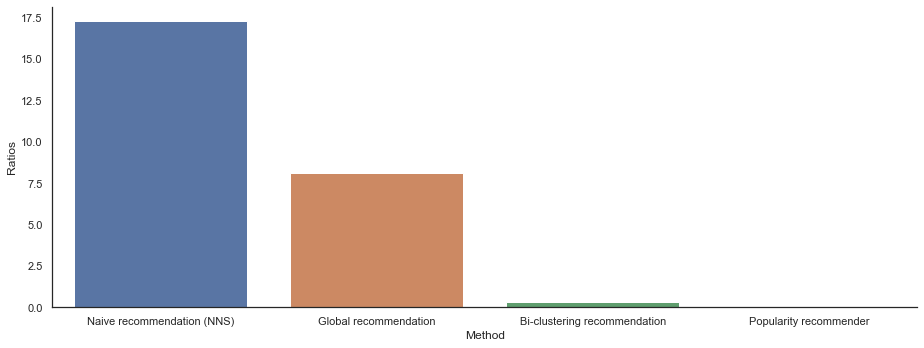

In [39]:
sns.set_theme(style="white")

sns.catplot(data=coverage, x='Method', y='Ratios', kind='bar', height=5, aspect=13/5)

# Personalization

In [40]:
personalization = pd.DataFrame(columns=['Method', 'Value'])

In [41]:
personalization['Method'] = coverage['Method']

In [42]:
personalization['Value'] = [0.7730875771559563, 0.9646868686868687, 0.017747474747474512, 0]

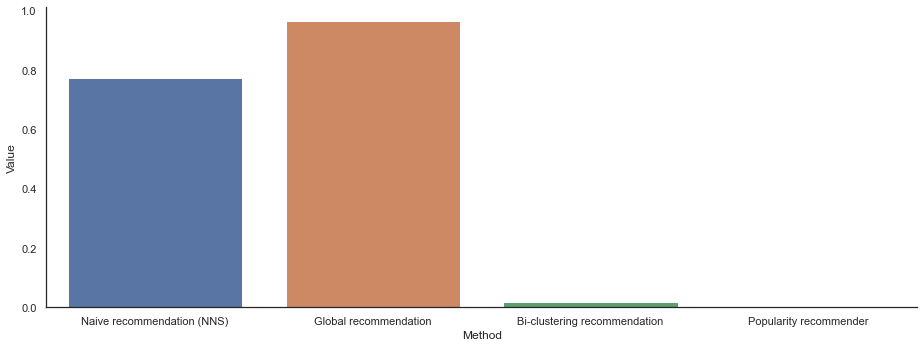

In [46]:
sns.set_theme(style="white")

sns.catplot(data=personalization, x='Method', y='Value', kind='bar', height=5, aspect=13/5)

# Intra-list similarity

In [49]:
intra_list_similarity = pd.DataFrame(columns=['Method', 'Value'])

In [50]:
intra_list_similarity['Method'] = ('Global recommendation', 'Bi-clustering recommendation')

In [51]:
intra_list_similarity['Value'] = [0.25032162364364974, 0.4249576538263387]

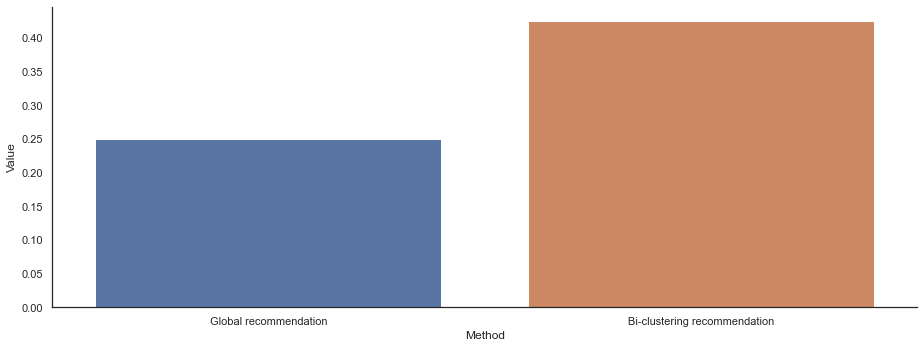

In [52]:
sns.set_theme(style="white")

sns.catplot(data=intra_list_similarity, x='Method', y='Value', kind='bar', height=5, aspect=13/5)